<a href="https://colab.research.google.com/github/Lwee-Ahn/Text_translate/blob/main/UsingCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
%time

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


In [2]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Data Loading

In [3]:
from google.colab import drive

drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [4]:
train_dir = "/content/gdrive/MyDrive/dataset/Training"
test_dir = "/content/gdrive/MyDrive/dataset/Testing"

In [5]:
os.listdir(train_dir)
os.listdir(train_dir+"/A")

['14.png',
 '1.png',
 '13.png',
 '12.png',
 '11.png',
 '15.png',
 '10.png',
 '17.png',
 '20.png',
 '19.png',
 '2.png',
 '18.png',
 '16.png',
 '3.png',
 '5.png',
 '4.png',
 '9.png',
 '7.png',
 '6.png',
 '8.png']

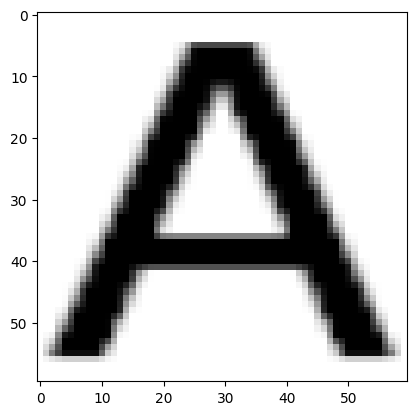

In [6]:

img = cv2.imread(train_dir+'/A/1.png')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

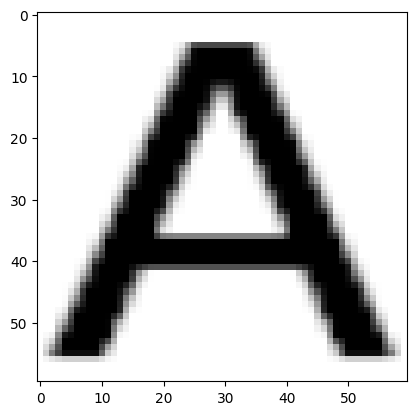

In [7]:
plt.imshow(img_rgb)

In [8]:
img.shape

(60, 60, 3)

# Modeling

In [9]:
import tensorflow as tf
model           = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(20,20,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics =['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [12]:
batch_size = 50

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(20, 20),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen .flow_from_directory(test_dir,
                                            target_size=(20, 20),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 520 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


In [13]:
history = model.fit(training_set,

                         steps_per_epoch= 520//batch_size,

                         epochs=15,
                         verbose = 2,
                         shuffle = False)

Epoch 1/15
10/10 - 166s - loss: 3.1825 - acc: 0.1460 - 166s/epoch - 17s/step
Epoch 2/15
10/10 - 1s - loss: 2.4656 - acc: 0.5640 - 736ms/epoch - 74ms/step
Epoch 3/15
10/10 - 1s - loss: 1.1517 - acc: 0.7760 - 742ms/epoch - 74ms/step
Epoch 4/15
10/10 - 1s - loss: 0.4067 - acc: 0.9000 - 743ms/epoch - 74ms/step
Epoch 5/15
10/10 - 1s - loss: 0.1163 - acc: 0.9820 - 742ms/epoch - 74ms/step
Epoch 6/15
10/10 - 1s - loss: 0.0417 - acc: 0.9980 - 780ms/epoch - 78ms/step
Epoch 7/15
10/10 - 1s - loss: 0.0320 - acc: 0.9940 - 799ms/epoch - 80ms/step
Epoch 8/15
10/10 - 1s - loss: 0.0223 - acc: 0.9960 - 768ms/epoch - 77ms/step
Epoch 9/15
10/10 - 1s - loss: 0.0157 - acc: 1.0000 - 740ms/epoch - 74ms/step
Epoch 10/15
10/10 - 1s - loss: 0.0147 - acc: 0.9960 - 759ms/epoch - 76ms/step
Epoch 11/15
10/10 - 1s - loss: 0.0094 - acc: 1.0000 - 731ms/epoch - 73ms/step
Epoch 12/15
10/10 - 1s - loss: 0.0056 - acc: 1.0000 - 765ms/epoch - 77ms/step
Epoch 13/15
10/10 - 1s - loss: 0.0024 - acc: 1.0000 - 733ms/epoch - 73ms/

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 200)               3

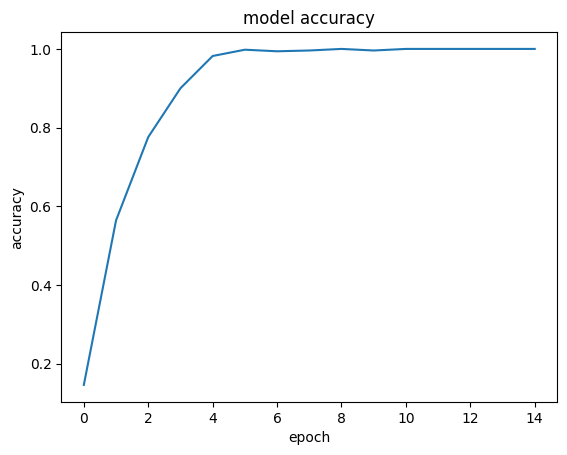

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history[     'acc' ]

# loss     = history.history[    'loss' ]


epochs   = range(len(acc))
plt.plot  ( epochs,     acc ,label = 'Accuracy')
plt.title ('Training Accuracy')
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.figure()

plt.show()



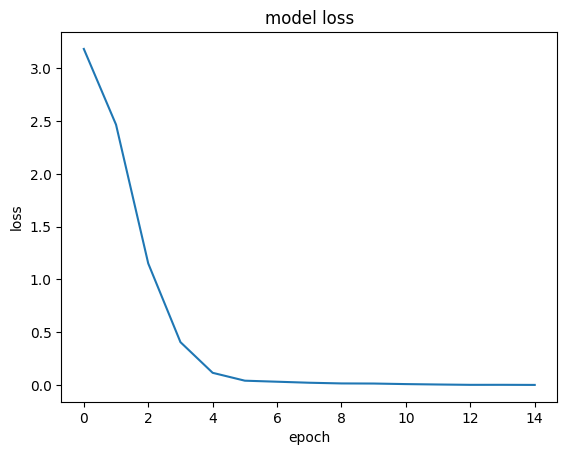

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
loss     = history.history[    'loss' ]

plt.plot  ( epochs,     loss )
plt.title ('Training Loss')
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.figure()

plt.show()

In [17]:
class_dictionary = test_set.class_indices
print("Label dictionary : ",class_dictionary)

Label dictionary :  {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [18]:
y_predicted = model.predict(test_set)

6/6 [==============================] - 77s 15s/step


In [19]:
y_predicted

array([[1.06318973e-01, 2.09621930e-06, 3.60231090e-04, ...,
        1.08037901e-03, 2.01733783e-04, 3.16728809e-04],
       [3.54748080e-03, 2.85505394e-07, 1.58454932e-03, ...,
        2.47852206e-02, 7.33343838e-03, 3.23899984e-02],
       [1.69403795e-02, 9.48205070e-08, 4.01720928e-04, ...,
        1.09938715e-04, 1.40093389e-05, 2.49111122e-06],
       ...,
       [2.17706166e-11, 1.28245246e-08, 2.47390736e-02, ...,
        2.39591788e-12, 7.40365343e-14, 3.93227806e-09],
       [3.29888916e-09, 5.74813021e-06, 7.23902183e-03, ...,
        3.95863030e-12, 3.28668104e-12, 4.83823257e-08],
       [1.88488946e-06, 4.56377380e-09, 1.77338677e-08, ...,
        2.90817820e-06, 2.03414832e-08, 1.62134075e-08]], dtype=float32)

In [20]:
folder_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'] # Please don't forget to change here
y_pred = []
for folder in folder_names:
    path = test_dir+"/"+folder
    path_fnames = os.listdir(path)
    for i in path_fnames:
        path2 = path+'/'+i
        img = tf.keras.preprocessing.image.load_img(path2, target_size=(20,20))
        x = tf.keras.preprocessing.image.img_to_array(img)
        x = np.expand_dims(x,axis=0)
        x /= 255.0
        images = np.vstack([x])# [1 2 3 4 5 6]
        classes = model.predict(x)
        y_classes=classes.argmax(axis=-1)
        y_pred.append(y_classes[0])
    print()

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 28ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 32ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 25ms/step

1/1 [==============================] - 0s 18ms

In [23]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 1,
 1,
 1,
 9,
 1,
 1,
 9,
 9,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 9,
 9,
 3,
 9,
 3,
 3,
 9,
 4,
 11,
 4,
 4,
 9,
 4,
 4,
 4,
 4,
 11,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 9,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 21,
 21,
 12,
 21,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 9,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 9,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 6,
 18,
 18,
 18,
 18,
 18,
 9,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,

In [22]:
y_true = test_set.classes.tolist()
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]


# Evulation

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  6  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  6  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  7  0  0  0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_true, y_pred)*100,'%')
print('Precision Macro Score ',precision_score(y_true, y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_true, y_pred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_true, y_pred, average = 'macro')*100,'%')

Accuracy Score 88.84615384615384 %
Precision Macro Score  95.40613232920924 %
Recall_Score 88.84615384615385 %
F1_Score 90.30152203294384 %


In [26]:


# img = tf.keras.preprocessing.image.load_img("/content/C1.png",target_size=(20,20))
# x = tf.keras.preprocessing.image.img_to_array(img)
# x = np.expand_dims(x,axis=0)
# x /= 255.0
# images = np.vstack([x])# [1 2 3 4 5 6]
# classes = model.predict(x)
# y_classes=classes.argmax(axis=-1)
# # for i in y_classes:
# #   print(i)
# print(y_classes[0])

def result(y):
  if y[0]==0:
    return 'A'
  elif y[0]==1:
    return 'B'
  elif y[0]==2:
    return 'C'
  elif y[0]==3:
    return 'D'
  elif y[0]==4:
    return 'E'
  elif y[0]==5:
    return 'F'
  elif y[0]==6:
    return 'G'
  elif y[0]==7:
    return 'H'
  elif y[0]==8:
    return 'I'
  elif y[0]==9:
    return 'J'
  elif y[0]==10:
    return 'K'
  elif y[0]==11:
    return 'L'
  elif y[0]==12:
    return 'M'
  elif y[0]==13:
    return 'N'
  elif y[0]==14:
    return 'O'
  elif y[0]==15:
    return 'P'
  elif y[0]==16:
    return 'Q'
  elif y[0]==17:
    return 'R'
  elif y[0]==18:
    return 'S'
  elif y[0]==19:
    return 'T'
  elif y[0]==20:
    return 'U'
  elif y[0]==21:
    return 'V'
  elif y[0]==22:
    return 'W'
  elif y[0]==23:
    return 'X'
  elif y[0]==24:
    return 'Y'
  elif y[0]==25:
    return 'Z'

# res = result(y_classes)
# print(res)



In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [37]:
img = cv2.imread('/content/Screenshot (107).png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

h,w,c = img.shape
print(h,w,c)

392 490 3


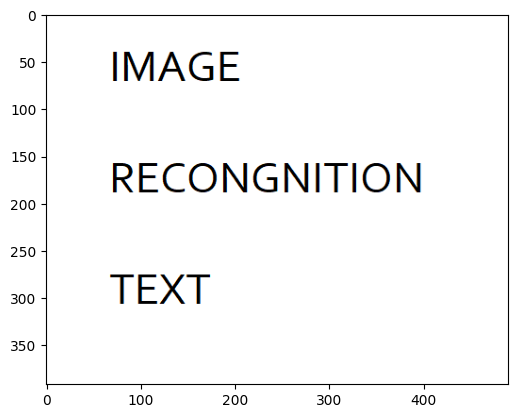

In [38]:
if w > 1000:
  new_w = 1000
  ar = w/h
  new_h = int(new_w/ar)
  img = cv2.resize(img, (new_w,new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img)

In [39]:
def thresholding(image):
  img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  ret, thresh= cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)
  plt.imshow(thresh, cmap='gray')
  return thresh

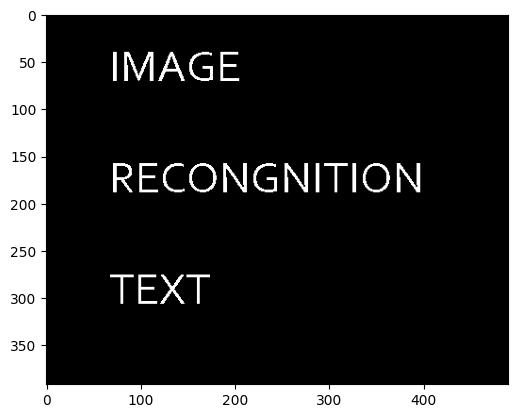

In [40]:
thresh_img = thresholding(img)
plt.imshow(thresh_img, cmap='gray')

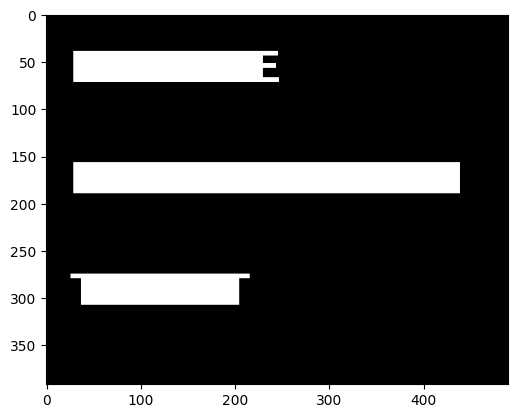

In [41]:
kernel = np.ones((3,85), np.uint8)
dilated_image = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated_image, cmap='gray')

In [42]:
(contours,hierarchy) = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))
# print(contours)

x,y,w,h = cv2.boundingRect(contours[0])
print(x,y,w,h)

3
26 275 190 33


In [43]:
sorted_conoturs_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1])

[[26, 275, 216, 308], [29, 157, 439, 190], [29, 39, 247, 72]]


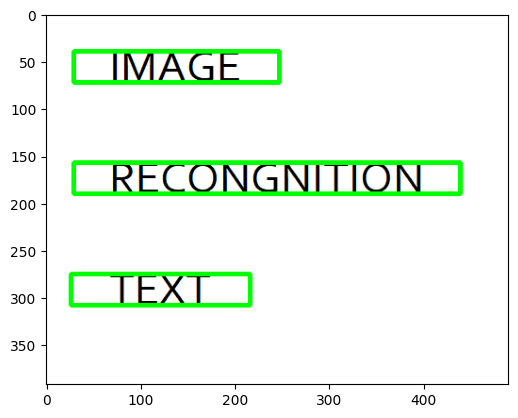

In [44]:
img2 = img
line_list = []

for ctr in contours:
  x,y,w,h = cv2.boundingRect(ctr)

  cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),3)
  line_list.append([x,y,x+w,y+h])

plt.imshow(img2)
print(line_list)

4
1/1 [==============================] - 0s 34ms/step
JHXJ
12
1/1 [==============================] - 0s 94ms/step
RHLUNGNIJIUN
5
1/1 [==============================] - 0s 27ms/step
IMAGH


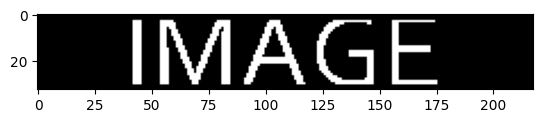

In [45]:
from operator import length_hint

def reverse(str):
    s = ''

    for ch in str:
        s = ch + s
    return s


img_copy=img
for line in line_list:
  roi = img_copy[line[1]:line[3], line[0]:line[2]]
  # print(roi)
  thresh_img2 = thresholding(roi)

  kernel = np.ones((3,3), np.uint8)
  dilated_image2 = cv2.dilate(thresh_img2, kernel, iterations = 1)

  (contours,hierarchy) = cv2.findContours(dilated_image2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  print(len(contours))

  sorted_conoturs_letters = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[0])


  letter_list = []
  res = ''
  final = ''
  for ctr in contours:
    x,y,w,h = cv2.boundingRect(ctr)

    cv2.rectangle(roi,(x,y),(x+w,y+h),(0,255,0),2)
    letter_list.append([x,y,x+w,y+h])

  for letter in letter_list:
    roi_letter = roi[letter[1]:letter[3], letter[0]:letter[2]]
      # print(len(roi_letter))
    cv2.imwrite('letter.png', roi_letter)

    image_receive = tf.keras.preprocessing.image.load_img("/content/letter.png", target_size=(20,20))
    x = tf.keras.preprocessing.image.img_to_array(image_receive)
    x = np.expand_dims(x,axis=0)
    x /= 255.0
    images = np.vstack([x])# [1 2 3 4 5 6]
    classes = model.predict(x)
    y_classes=classes.argmax(axis=-1)

    res += result(y_classes)

  print(reverse(res))



In [ ]:
model.save('characterCNN2.h5')